In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import random 

In [67]:
class NN():
    def __init__(self,inputs,outputs,epochs=20,lr=1,threshold=False,plot=False):
        self.inputs = inputs
        self.outputs =  outputs
        self.epochs = epochs
        self.input_shape = inputs.shape[1]
        self.synaptic_weights = self.random_wegihts()
        self.lr = lr
        self.mse_ = 0
        self.acc = 0
        self.predicted_outputs = 0
        self.threshold = threshold
        self.history = {
            'performance':{
            'acc':[],
            'loss':[]
            }
        }
        self.plot = plot
        
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x)) 
    
    def sigmoid_derivative(self,x):
        return x * (1 - x)
        
    def random_wegihts(self):
        return 2 * np.random.random((self.input_shape,1)) - 1 
    
    def accuracy(self,y_pred,y_true):
        y_pred = y_pred.round(0).flatten().astype(np.int64)
        y_true = y_true.round(0).flatten().astype(np.int64)

        correct = 0
        len_ = len(y_true)
        for i in range(len_):
            if y_pred[i]==y_true[i]:
                correct += 1
        return np.round(float(correct/len_) * 100,2)
    
    def mse(self,error):
        return np.square(error).mean()
        

    def print_results(self,epoch,y_predict):
        print(f'Epoch {epoch}/{self.epochs} -- acc {self.acc} % -- mse  {self.mse_}')
        
    def summary(self):
        print(self.acc)
        print(f'MSE : {np.round(self.mse_,5)} -- Accuracy: {self.acc} %')
       # return {'acc':self.acc,'mse':self.mse}
    
    
    def plot_model(self):
        history = self.history['performance']

        acc = history['acc']
        loss = history['loss']

        plt.figure(figsize=(7,10))

        plt.subplot(211)
        plt.title('Accuracy')
        plt.plot(acc, label='Training')

        plt.legend()

        # plot accuracy during training
        plt.subplot(212)
        plt.title('MSE Error')
        plt.plot(loss, label='Training',c="red")
        #plt.ylim(500,10)

        plt.legend()
        plt.show()

    
    
    
        
    def train(self):
        predicted_outputs = 0
        weights = 0
        
        for iter_ in range(self.epochs):
            
            # Threshold function
            if self.threshold != False:
                if self.threshold <= self.acc:
                    break
            
            #print('Iter number : ',iter_)
            inputs_ = self.inputs
            weights = self.synaptic_weights
            dot_vectors = np.dot(inputs_,weights)
            predicted_outputs = self.sigmoid(dot_vectors)            

            # how much did we miss?
            error = self.outputs - predicted_outputs 
            
            
            # update model params
            self.mse_ = self.mse(error)
            self.predicted_outputs = predicted_outputs
            self.acc = self.accuracy(predicted_outputs,self.outputs)
            
            
            performance = self.history['performance']
            performance['acc'].append(self.acc)
            performance['loss'].append(self.mse_)
            
            
            if self.plot != False:
                self.plot_model()



            # multiply how much we missed by the
            # slope of the sigmoid at the values in outputs
            adjustments = error * self.sigmoid_derivative(predicted_outputs) * self.lr
            #print('adjustments',adjustments)

            # update weights 
            self.synaptic_weights += np.dot(inputs_.T, adjustments)
            #print('wegihts +=',np.dot(inputs_.T, adjustments))
            self.print_results(iter_,predicted_outputs)
            

        return predicted_outputs
    
    
    
        

# Back Propgation :
<img src ="https://i2.wp.com/www.nmthgiat.com/wp-content/uploads/2018/07/geo.png?w=623&ssl=1"/>

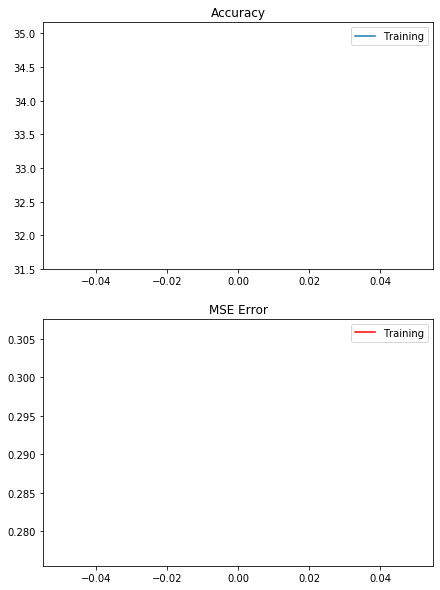

Epoch 0/200000 -- acc 33.33 % -- mse  0.2915369406900167


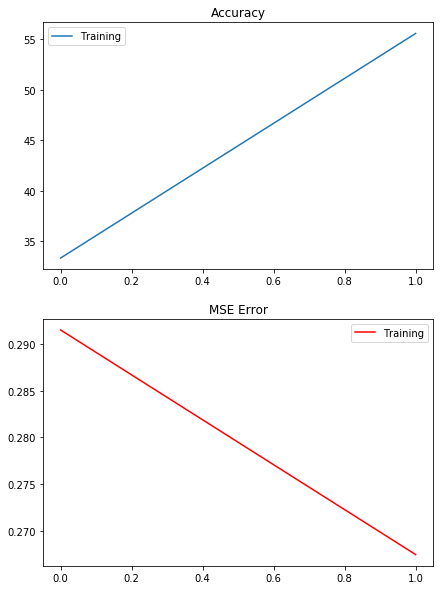

Epoch 1/200000 -- acc 55.56 % -- mse  0.2674425264001885


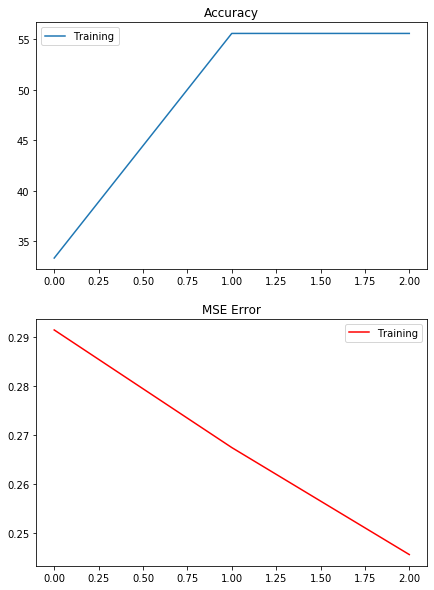

Epoch 2/200000 -- acc 55.56 % -- mse  0.245514261139647


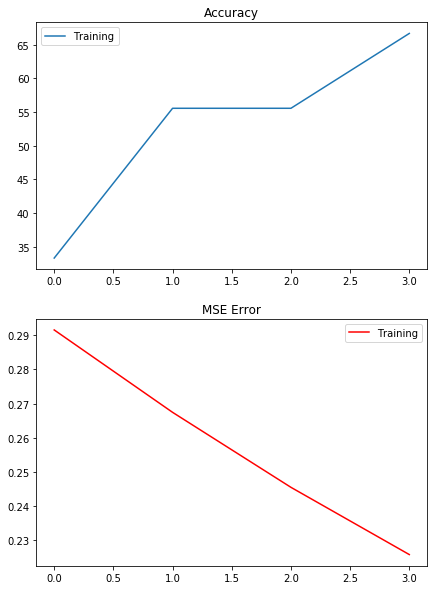

Epoch 3/200000 -- acc 66.67 % -- mse  0.22584746303406866


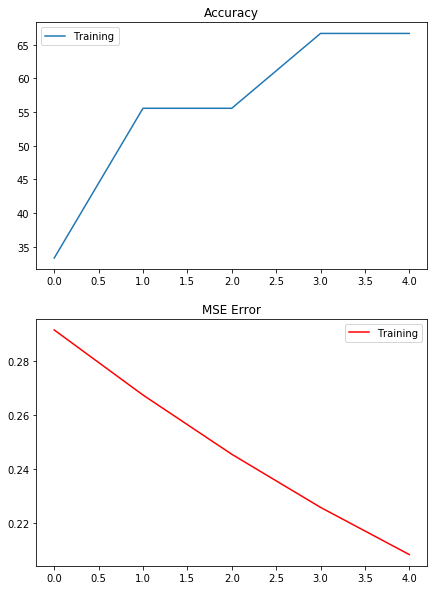

Epoch 4/200000 -- acc 66.67 % -- mse  0.20837414695631892


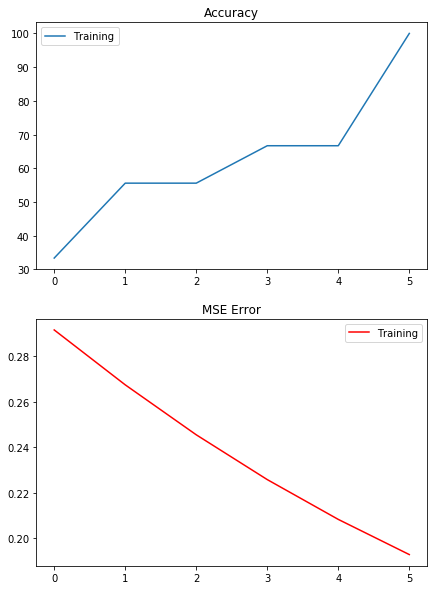

Epoch 5/200000 -- acc 100.0 % -- mse  0.19293584492631402


In [68]:
# input dataset
training_inputs = np.array([[0,0,1],
                            [1,1,1],
                            [1,0,1],
                            [0,1,1],
                            [0,1,0],
                            [0,1,0],
                            [0,1,0],
                            [1,1,1],
                            [0,1,1]
                           
                           ])

# output dataset
training_outputs = np.array([[0,
                              1,
                              1,
                              0,
                              0,
                              0,
                              0,
                              1,
                              0]]).T


nn = NN(training_inputs,training_outputs,200000,0.3,90,True)
outputs = nn.train()
predicted_outputs = outputs.round(0).flatten().astype(np.int64)

In [63]:
nn.summary()

100.0
MSE : 0.18631 -- Accuracy: 100.0 %


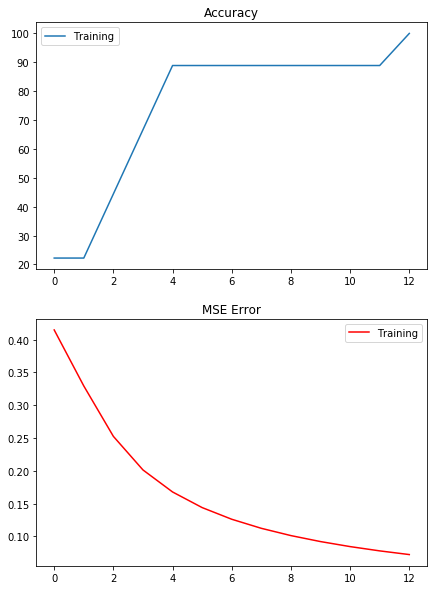

In [59]:
nn.plot_model()

In [69]:
nn.summary()

100.0
MSE : 0.19294 -- Accuracy: 100.0 %


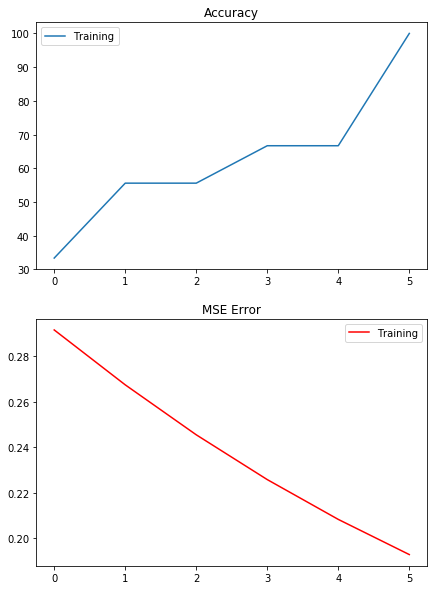

In [70]:
nn.plot_model()